<a href="https://colab.research.google.com/github/girupashankar/Deep-Learning/blob/main/Feedforward_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Feedforward Neural Networks (FNN)

#### Overview
Feedforward Neural Networks (FNNs) are a class of artificial neural networks where connections between nodes do not form cycles. This is the simplest type of artificial neural network devised. In FNNs, information moves in one direction—from input nodes, through hidden nodes (if any), and to output nodes.

#### Architecture
1. **Input Layer**: Receives the input data.
2. **Hidden Layers**: Intermediate layers that transform the input into something the output layer can use. Each layer consists of nodes/neurons connected to the previous and next layer.
3. **Output Layer**: Produces the final output of the network.

Each neuron in a layer receives input from the neurons of the previous layer, performs a weighted sum of these inputs, adds a bias, and applies an activation function to compute its output.

#### Activation Functions
Common activation functions used in FNNs include:
- **Sigmoid**: \( \sigma(x) = \frac{1}{1 + e^{-x}} \)
- **ReLU (Rectified Linear Unit)**: \( f(x) = \max(0, x) \)
- **Tanh (Hyperbolic Tangent)**: \( \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)

#### Training
Training an FNN involves adjusting the weights and biases using a process called backpropagation, which calculates the gradient of the loss function with respect to each weight by the chain rule, iteratively updating the weights to minimize the loss.

### Real-World Examples

1. **Image Classification**
   - **Example**: Classifying images of handwritten digits (like in the MNIST dataset) into their respective categories (0-9).
   - **Application**: Optical Character Recognition (OCR) systems used in digitizing handwritten documents.
   - **Explanation**: An FNN can take pixel values as input, process them through hidden layers, and output the probability distribution over the 10 possible digits.

2. **Spam Detection**
   - **Example**: Determining whether an email is spam or not.
   - **Application**: Email filtering systems like those used by Gmail or Outlook.
   - **Explanation**: An FNN can be trained on a dataset of labeled emails (spam or not spam) to learn patterns and characteristics typical of spam emails.

3. **Predictive Maintenance**
   - **Example**: Predicting equipment failure in industrial machines.
   - **Application**: Monitoring systems in manufacturing plants that predict when a machine is likely to fail based on sensor data.
   - **Explanation**: An FNN can take various sensor readings as input and predict the probability of failure, helping to schedule maintenance before breakdowns occur.

4. **Financial Forecasting**
   - **Example**: Predicting stock prices or market trends.
   - **Application**: Financial analysis tools used by traders and investment firms.
   - **Explanation**: An FNN can analyze historical price data and other financial indicators to forecast future market movements.

### Practical Example: Predicting House Prices

1. **Problem Definition**: Predict the price of a house based on features like size, number of bedrooms, location, etc.
2. **Data Collection**: Collect a dataset of house prices and their features.
3. **Data Preparation**: Normalize the features and split the data into training and testing sets.
4. **Model Design**: Design an FNN with input neurons corresponding to the number of features, several hidden layers, and one output neuron for the predicted price.
5. **Training**: Train the network using historical data on house prices, adjusting weights through backpropagation.
6. **Evaluation**: Test the model on unseen data to evaluate its performance, using metrics like Mean Squared Error (MSE).

FNNs are foundational to understanding more complex neural network architectures and are widely used in various fields due to their simplicity and effectiveness in handling a broad range of problems.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [31]:
# Generate a sample dataset (replace this with your actual dataset)
np.random.seed(0)
data_size = 500
features = pd.DataFrame({
    'size': np.random.randint(500, 5000, data_size),
    'bedrooms': np.random.randint(1, 5, data_size),
    'age': np.random.randint(1, 30, data_size),
    'location': np.random.randint(1, 10, data_size)
})
prices = features['size'] * 300 + features['bedrooms'] * 5000 - features['age'] * 200 + features['location'] * 1000 + np.random.randint(-10000, 10000, data_size)


In [32]:
print(features)

     size  bedrooms  age  location
0    3232         3   28         1
1    3107         4    2         2
2    2153         1   19         1
3    3764         2   22         9
4    1533         3   29         9
..    ...       ...  ...       ...
495  3434         1   16         7
496  4884         1    8         4
497   615         4   13         5
498  3184         4    4         2
499  3746         4    2         7

[500 rows x 4 columns]


In [33]:
print(prices)

0       981638
1       963584
2       653788
3      1150676
4       480105
        ...   
495    1030323
496    1463868
497     207609
498     986254
499    1158582
Length: 500, dtype: int64


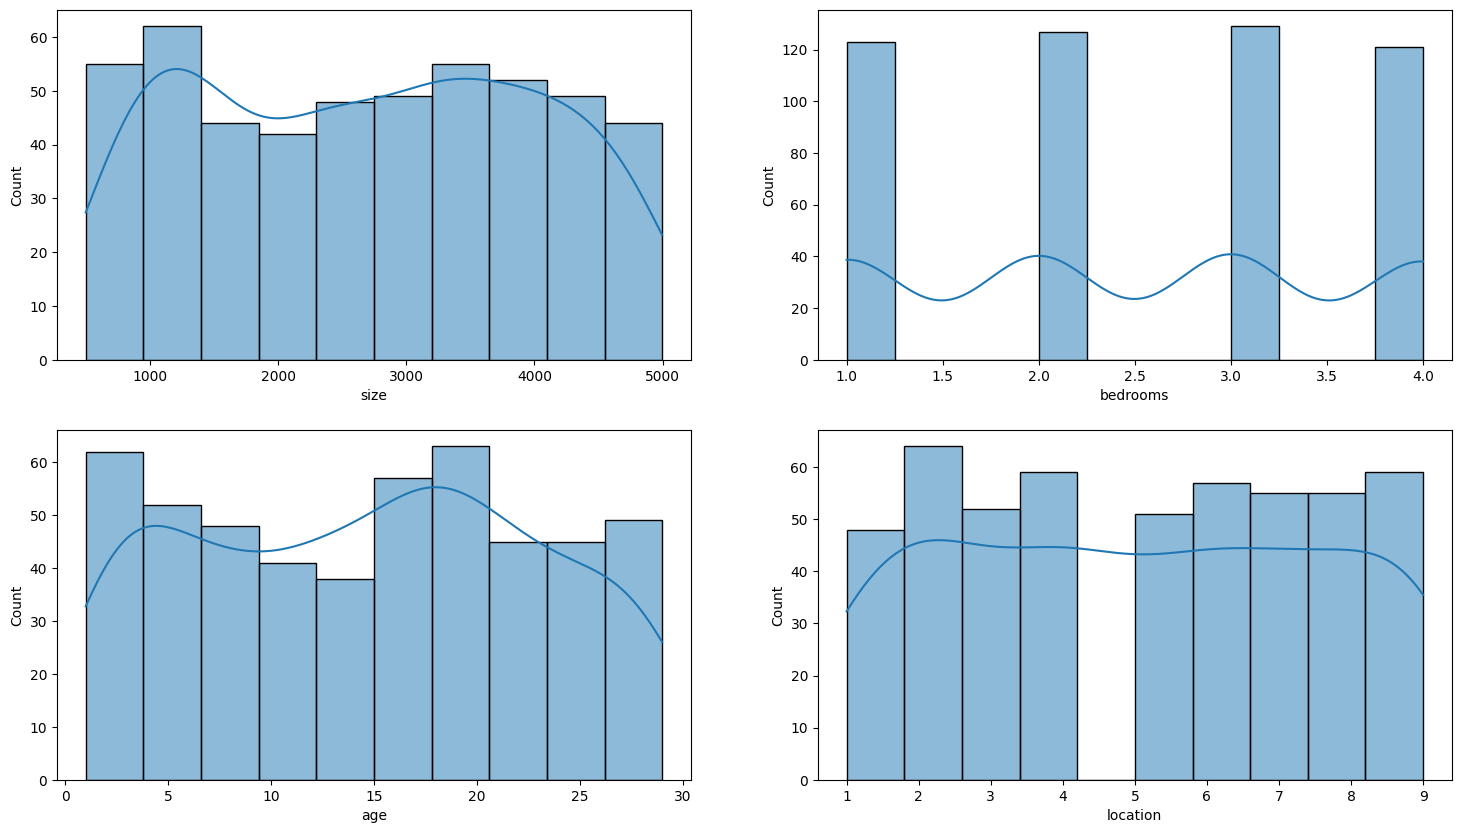

In [34]:
# shows each columns distribution

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.histplot(data=features, x="size", kde=True, ax=axes[0, 0])
sns.histplot(data=features, x="bedrooms", kde=True, ax=axes[0, 1])
sns.histplot(data=features, x="age", kde=True, ax=axes[1, 0])
sns.histplot(data=features, x="location", kde=True, ax=axes[1, 1])

plt.show()

<Axes: ylabel='Count'>

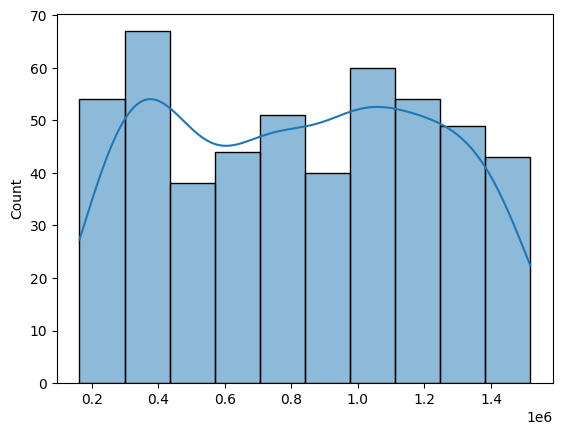

In [35]:
sns.histplot(prices, kde=True)

In [36]:
# Combine features and prices into a single DataFrame
df = pd.concat([features, pd.Series(prices, name='price')], axis=1)

In [37]:
print(df)

     size  bedrooms  age  location    price
0    3232         3   28         1   981638
1    3107         4    2         2   963584
2    2153         1   19         1   653788
3    3764         2   22         9  1150676
4    1533         3   29         9   480105
..    ...       ...  ...       ...      ...
495  3434         1   16         7  1030323
496  4884         1    8         4  1463868
497   615         4   13         5   207609
498  3184         4    4         2   986254
499  3746         4    2         7  1158582

[500 rows x 5 columns]


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   size      500 non-null    int64
 1   bedrooms  500 non-null    int64
 2   age       500 non-null    int64
 3   location  500 non-null    int64
 4   price     500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB
None


In [39]:
print(df.describe())

              size    bedrooms         age    location         price
count   500.000000  500.000000  500.000000  500.000000  5.000000e+02
mean   2701.370000    2.496000   14.666000    5.042000  8.250367e+05
std    1310.569173    1.108351    8.392814    2.581776  3.933110e+05
min     500.000000    1.000000    1.000000    1.000000  1.628310e+05
25%    1455.000000    2.000000    7.000000    3.000000  4.516028e+05
50%    2729.500000    2.500000   15.000000    5.000000  8.348550e+05
75%    3801.750000    3.000000   21.000000    7.000000  1.154638e+06
max    4996.000000    4.000000   29.000000    9.000000  1.518450e+06


In [40]:
# Split the data into training and testing sets
X = df.drop('price', axis=1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
print(X_train)

[[ 0.84926405 -1.33496262  0.0168439  -1.55563775]
 [ 0.05492679  0.45393201  0.48965518 -1.55563775]
 [ 1.75763215  0.45393201 -1.63799557 -0.39974592]
 ...
 [ 1.03155825 -1.33496262 -0.5741702  -0.01444865]
 [ 1.66764863 -1.33496262 -0.45596738 -0.01444865]
 [-0.06375836  1.34837933  0.25324954  0.37084863]]


In [43]:
print(X_test)

[[ 1.56913219 -1.33496262 -0.21956174 -0.01444865]
 [ 0.77944925  1.34837933 -0.92877865 -0.39974592]
 [-0.26466984 -0.4405153  -0.45596738 -1.17034048]
 [ 0.96794921  0.45393201 -0.21956174 -0.7850432 ]
 [-0.363962   -0.4405153   0.607858    0.37084863]
 [-0.03117813 -0.4405153   0.37145236 -1.55563775]
 [ 1.23324544  0.45393201 -1.63799557  0.7561459 ]
 [ 1.50397172  1.34837933 -0.45596738  0.37084863]
 [ 1.45199848 -0.4405153  -0.81057583  0.7561459 ]
 [-0.35930768  0.45393201  1.08066928 -0.39974592]
 [-0.22898672  1.34837933  0.84426364 -0.39974592]
 [-1.20716962  1.34837933 -1.51979275  0.37084863]
 [-1.39566957  1.34837933 -0.45596738 -0.01444865]
 [-1.31809757  0.45393201  0.25324954  1.52674046]
 [ 0.97880929 -0.4405153   0.13504672 -0.39974592]
 [ 1.38451084  1.34837933 -0.92877865 -0.01444865]
 [ 1.04241833 -0.4405153  -0.33776456 -1.17034048]
 [-0.06453408 -0.4405153  -0.45596738 -0.7850432 ]
 [ 1.69402311 -0.4405153  -0.92877865  0.37084863]
 [-0.02109377  0.45393201  0.25

In [46]:
# Build the FNN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [47]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/500
10/10 [==============================] - 0s 26ms/step - loss: 807982202880.0000 - val_loss: 802908274688.0000
Epoch 2/500
10/10 [==============================] - 0s 12ms/step - loss: 807285948416.0000 - val_loss: 802284896256.0000
Epoch 3/500
10/10 [==============================] - 0s 10ms/step - loss: 806570754048.0000 - val_loss: 801663942656.0000
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 805869584384.0000 - val_loss: 801025687552.0000
Epoch 5/500
10/10 [==============================] - 0s 10ms/step - loss: 805168611328.0000 - val_loss: 800354861056.0000
Epoch 6/500
10/10 [==============================] - 0s 11ms/step - loss: 804396662784.0000 - val_loss: 799708545024.0000
Epoch 7/500
10/10 [==============================] - 0s 9ms/step - loss: 803668295680.0000 - val_loss: 799032934400.0000
Epoch 8/500
10/10 [==============================] - 0s 8ms/step - loss: 802894905344.0000 - val_loss: 798354440192.0000
Epoch 9/500
10/10 [========

In [55]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')

4/4 [==============================] - 0s 3ms/step - loss: 22041544704.0000
Test Loss: 22041544704.0


In [56]:
# Predicting house prices for the test set
predictions = model.predict(X_test, verbose=1)

4/4 [==============================] - 0s 2ms/step


In [57]:
# Displaying a few predictions alongside actual prices
for i in range(10):
    print(f'Actual Price: {y_test[i]}, Predicted Price: {predictions[i][0]}')

Actual Price: 1418904, Predicted Price: 1430996.75
Actual Price: 1132063, Predicted Price: 1004013.1875
Actual Price: 723716, Predicted Price: 543832.3125
Actual Price: 1200354, Predicted Price: 1149019.875
Actual Price: 684845, Predicted Price: 438357.09375
Actual Price: 809940, Predicted Price: 725736.9375
Actual Price: 1304562, Predicted Price: 1161703.5
Actual Price: 1411931, Predicted Price: 1379387.75
Actual Price: 1397387, Predicted Price: 1313751.125
Actual Price: 689133, Predicted Price: 507314.78125


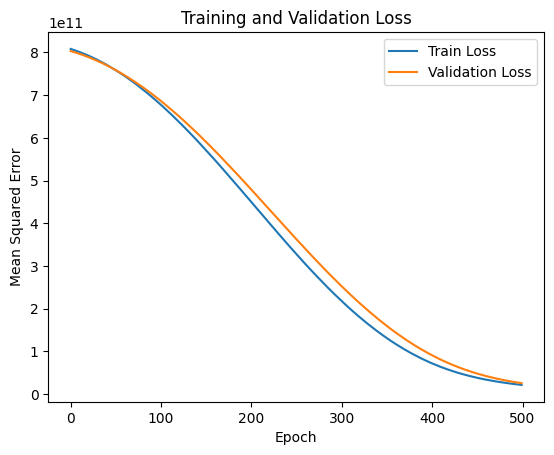

In [58]:
# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
